## Predicting Real Estate Housing Prices in the United States
Data Set: https://www.kaggle.com/datasets/promptcloud/real-estate-data-from-trulia
Instances: 30,006

Arushi Agarwal, Hari Krishna Edvalapati, Soumya Kasireddy, Jessica Reynolds

In [25]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Importing Linear Regression model from sklearn
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

## Importing different classifiers from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression   
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

##Imporing packages for other Regressors
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Classifier Algorithms

We first ran classifier algorithms using the "Price Category" which split the data into 10 different price bands. When those algorithms were not successful in accurately classifiying between those groups, we created new bands in "Price Category2" that only contained 4 categories. We have only shared the final code using "Price Category2"

In [3]:
pd.options.mode.chained_assignment = None

pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)

In [3]:
df = pd.read_csv("Cleaned_Turlia_realestate_data.csv")
df.sample(5)

,Unnamed: 0,Uniq Id,Price,Sqr Ft,Lot Size,Beds,Bath,Year Built,Features,Last Sold Year,...,Air Conditioning,Basement,Patio,Porch,Washer,Dryer,Laundry,Stories,House Age,Price Category
5678,5752,b68fa9495f0ccf4f4337722a57c6ca73,595000,2737,12196.8,3,2.5,1995,Single Family Home | $217/sqft | Lot Size: 0.2...,2019.0,...,1,0,1,0,0,0,0,1,24,under600k
25923,26212,ed09b8212c118fd4a0ac8d32a953d3f4,569000,5305,12196.8,7,5.0,2007,Single Family Home | $107/sqft | Lot Size: 0.2...,2007.0,...,1,0,0,0,1,1,2,2,12,under600k
20915,21165,5bf046e8a469ccfb4617b693d8b5bbe1,392000,2285,0.0,3,2.0,-1,Single Family Home | $172/sqft | 161 Days on T...,NaN,...,0,0,0,0,0,0,0,1,-1,under400k
4604,4661,c8d0a620a97581a872dcefa46ede365b,499900,4317,27007.2,3,4.0,1971,Single Family Home | $116/sqft | Lot Size: 0.6...,1995.0,...,1,0,1,0,0,0,0,1,48,under500k
27020,27324,9a28df100433a2272a822960f017bf88,435000,3536,11325.6,8,6.0,1979,Multi Family | $123/sqft | Lot Size: 0.26 acre...,2002.0,...,1,0,0,0,1,1,2,4,40,under500k


In [5]:
df.shape

(29686, 31)

In [6]:
df = df.drop(columns = ['Unnamed: 0', 'Uniq Id', 'Features', 'Year Built', 'Last Sold Year', 'Last Sold For',
       'Last Tax Assestment', 'Last Tax Year', 'Address', 'City', 'Zipcode'], axis = 1)
df.sample(5)

,Price,Sqr Ft,Lot Size,Beds,Bath,State,Property Type,Garage,Fireplace,HOA,Air Conditioning,Basement,Patio,Porch,Washer,Dryer,Laundry,Stories,House Age,Price Category
11201,1068000,1396,5856.0,3,2.0,CA,Single Family Home,1,1,0,1,0,0,0,1,1,2,1,41,under200k
11474,159000,991,991.0,2,2.0,MD,Condo,0,1,1,1,1,0,0,1,1,2,1,35,under200k
8776,269890,1523,0.0,3,2.5,FL,Townhouse,1,0,0,0,0,0,0,0,0,0,2,-1,under300k
3484,125000,1068,8281.0,3,2.0,FL,Single Family Home,0,0,0,1,0,0,0,0,0,0,1,56,under200k
12594,525000,2112,85377.6,2,3.0,NC,Townhouse,1,1,1,1,0,1,1,0,0,0,1,12,under600k


In [7]:
#Creating smaller bands for price category to use with classifier
PE_Conditions = [
    (df['Price'] < 200000),
    (df['Price'] >= 200000) & (df['Price'] < 400000),
    (df['Price'] >= 400000) & (df['Price'] < 600000),
    (df['Price'] >= 600000)
]
PE_Categories = ['under200k', 'under400k', 'under600k', 'over600k']
df['Price Category2'] = np.select(PE_Conditions, PE_Categories)

In [8]:
df['Price Category2'].value_counts()

under400k    10520
under200k     8385
over600k      6165
under600k     4616
Name: Price Category2, dtype: int64

It is nearly balanced case.

In [9]:
df.sample(5)

,Price,Sqr Ft,Lot Size,Beds,Bath,State,Property Type,Garage,Fireplace,HOA,Air Conditioning,Basement,Patio,Porch,Washer,Dryer,Laundry,Stories,House Age,Price Category,Price Category2
23760,304900,2148,10803.0,4,3.0,TX,Single Family Home,1,1,1,1,0,1,0,0,0,0,2,44,under400k,under400k
22155,217990,2298,0.0,4,2.5,FL,Single Family Home,1,0,0,0,0,0,0,0,0,0,2,-1,under300k,under400k
2439,215000,1754,6970.0,3,2.0,OK,Single Family Home,1,1,0,1,0,1,1,0,0,0,1,4,under300k,under400k
23481,329900,2794,19602.0,4,3.0,WA,Single Family Home,1,1,0,0,1,0,0,0,0,0,1,44,under400k,under400k
27959,839000,4390,5052.0,4,5.0,TX,Single Family Home,1,1,0,0,0,1,1,0,0,0,2,12,under900k,over600k


In [10]:
df.dtypes

Price                 int64
Sqr Ft                int64
Lot Size            float64
Beds                  int64
Bath                float64
State                object
Property Type        object
Garage                int64
Fireplace             int64
HOA                   int64
Air Conditioning      int64
Basement              int64
Patio                 int64
Porch                 int64
Washer                int64
Dryer                 int64
Laundry               int64
Stories               int64
House Age             int64
Price Category       object
Price Category2      object
dtype: object

In [11]:
df = pd.get_dummies(df, columns = ['State',
       'Property Type'])

df.sample(5)

,Price,Sqr Ft,Lot Size,Beds,Bath,Garage,Fireplace,HOA,Air Conditioning,Basement,Patio,Porch,Washer,Dryer,Laundry,Stories,House Age,Price Category,Price Category2,State_AK,State_AL,State_AZ,State_CA,State_CO,State_DC,State_FL,State_GA,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_MI,State_MN,State_NC,State_NE,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_TN,State_TX,State_VA,State_WA,State_WI,Property Type_Apartment,Property Type_Condo,Property Type_Coop,Property Type_Lot Land,Property Type_Mobile Manufactured,Property Type_Multi Family,Property Type_Single Family Home,Property Type_Townhouse,Property Type_Unknown
27723,14000,0,6534.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,under200k,under200k,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2585,12495000,14179,71438.4,7,13.0,1,1,0,1,0,1,1,0,0,0,2,5,under200k,over600k,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4694,189900,1392,5602.0,3,1.0,1,0,0,1,0,0,0,1,0,1,1,103,under200k,under200k,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2708,179900,1140,5436.0,3,2.0,1,0,0,1,0,0,0,0,0,0,1,29,under200k,under200k,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
29516,228900,1295,0.0,3,2.0,1,0,0,0,0,0,0,0,0,0,1,-1,under300k,under400k,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [12]:
df.shape

(29686, 62)

In [13]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df['Price Category2']= label_encoder.fit_transform(df['Price Category2'])
  
df['Price Category2'].unique()

array([0, 2, 1, 3])

In [14]:
df.columns

Index(['Price', 'Sqr Ft', 'Lot Size', 'Beds', 'Bath', 'Garage', 'Fireplace',
       'HOA', 'Air Conditioning', 'Basement', 'Patio', 'Porch', 'Washer',
       'Dryer', 'Laundry', 'Stories', 'House Age', 'Price Category',
       'Price Category2', 'State_AK', 'State_AL', 'State_AZ', 'State_CA',
       'State_CO', 'State_DC', 'State_FL', 'State_GA', 'State_IA', 'State_ID',
       'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA',
       'State_MD', 'State_MI', 'State_MN', 'State_NC', 'State_NE', 'State_NJ',
       'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR',
       'State_PA', 'State_TN', 'State_TX', 'State_VA', 'State_WA', 'State_WI',
       'Property Type_Apartment', 'Property Type_Condo', 'Property Type_Coop',
       'Property Type_Lot Land', 'Property Type_Mobile Manufactured',
       'Property Type_Multi Family', 'Property Type_Single Family Home',
       'Property Type_Townhouse', 'Property Type_Unknown'],
      dtype='object')

In [15]:
features = ['Sqr Ft', 'Lot Size', 'Beds', 'Bath', 'Garage', 'Fireplace',
       'HOA', 'Air Conditioning', 'Basement', 'Patio', 'Porch', 'Washer',
       'Dryer', 'Laundry', 'Stories', 'House Age', 'State_AK', 'State_AL', 'State_AZ', 'State_CA',
       'State_CO', 'State_DC', 'State_FL', 'State_GA', 'State_IA', 'State_ID',
       'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA',
       'State_MD', 'State_MI', 'State_MN', 'State_NC', 'State_NE', 'State_NJ',
       'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR',
       'State_PA', 'State_TN', 'State_TX', 'State_VA', 'State_WA', 'State_WI',
       'Property Type_Apartment', 'Property Type_Condo', 'Property Type_Coop',
       'Property Type_Lot Land', 'Property Type_Mobile Manufactured',
       'Property Type_Multi Family', 'Property Type_Single Family Home',
       'Property Type_Townhouse', 'Property Type_Unknown']

In [16]:
X = df[features].values             # Features
y = df['Price Category2'].values    # Target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.25, random_state=5)


**Feature Importance using Random Forest Classifier**

In [18]:
# Constructing a random forest classifier

rf_clf = RandomForestClassifier(max_depth=10, random_state=3)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=3)

In [19]:
# Finding the predictions of random forest classifier for train and test subsets

train_y_pred = rf_clf.predict(X_train)
test_y_pred = rf_clf.predict(X_test)

train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Random Forest Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Random Forest Classifier Test Classification Report: \n\n', test_report)

Random Forest Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       0.77      0.75      0.76      4587
           1       0.71      0.80      0.75      6291
           2       0.61      0.78      0.69      7932
           3       0.81      0.13      0.23      3454

    accuracy                           0.68     22264
   macro avg       0.72      0.62      0.61     22264
weighted avg       0.70      0.68      0.65     22264
 


Random Forest Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.72      0.69      0.71      1578
           1       0.67      0.76      0.71      2094
           2       0.55      0.72      0.63      2588
           3       0.58      0.07      0.12      1162

    accuracy                           0.62      7422
   macro avg       0.63      0.56      0.54      7422
weighted avg       0.62      0.62      0.59      7422



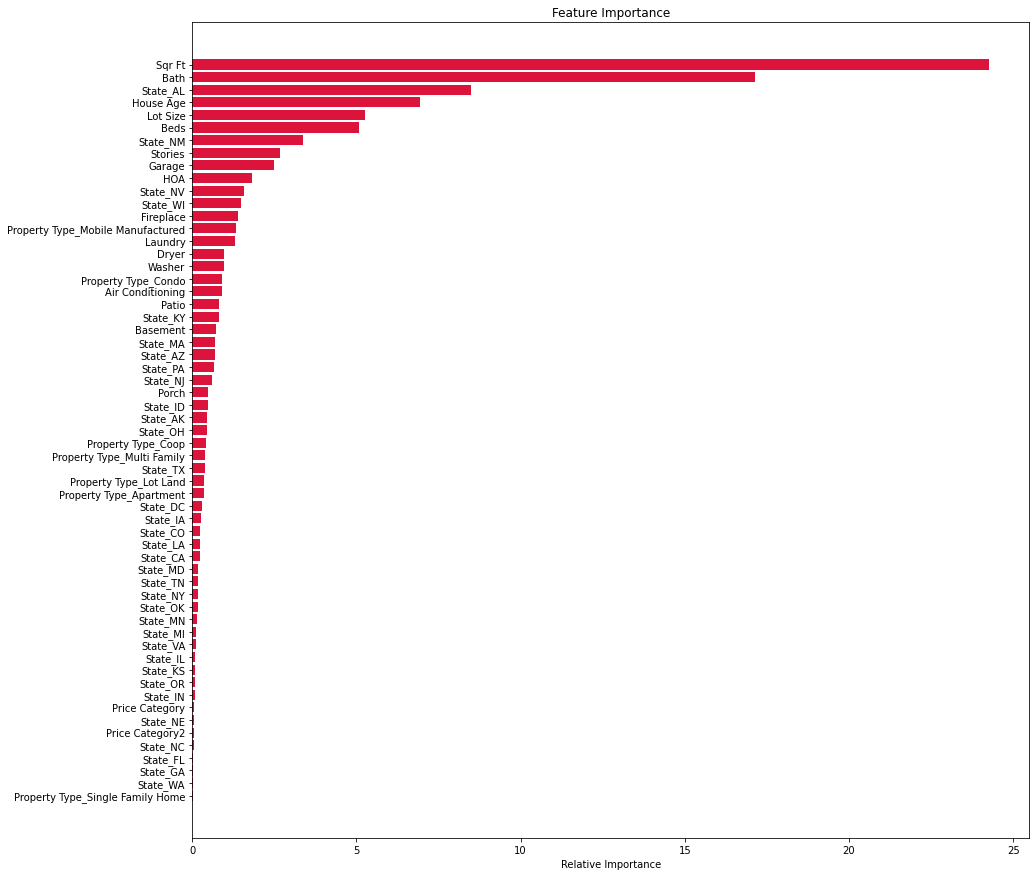

In [20]:
# Calculating the feature importance

feature_importance = rf_clf.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))

# Displaying the relative feature importance by a horizontal bar chart 

sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(15, 15))

plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, df.columns[1:][sorted_idx])
plt.show()

In [21]:
# Using important features for our models
imp_features = ['Sqr Ft', 'Bath', 'House Age', 'Lot Size', 'Beds']

X = df[imp_features].values           # Features
y = df['Price Category2'].values      # Target

**Pairplots**

In [22]:
new_df = df[['Sqr Ft', 'Bath', 'House Age', 'Lot Size', 'Beds', 'Price Category2']]

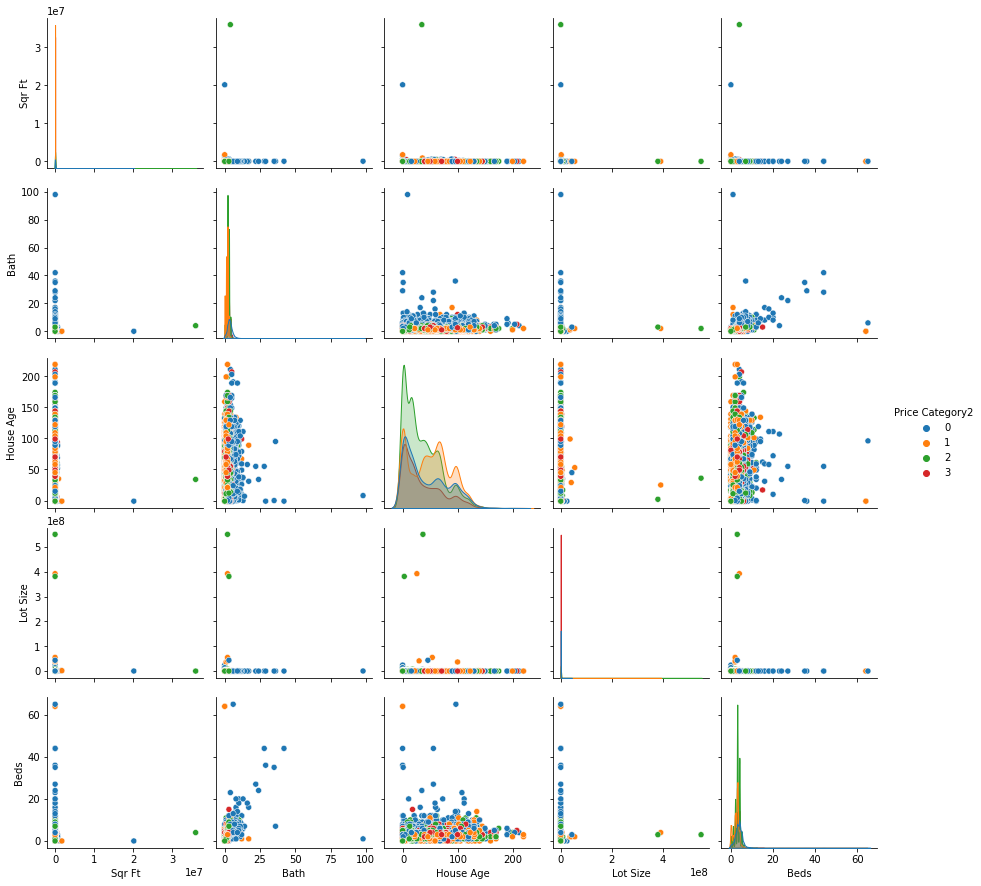

In [23]:
sns.pairplot(new_df, hue ='Price Category2', palette='tab10')        #Creating paiplots for all feature variables

**Spliting Train and Test Dataset**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.25, random_state=2, stratify=y)

**Logistic Regression**

In [25]:
logreg = LogisticRegression(penalty = 'l2', max_iter = 1000, C=10e-3) # Instantiating logistic regression 

logreg.fit(X_train, y_train)  # Fitting the train data to 'logreg'

# Predicted class for the test subset through logistic regression 

y_train_pred_prob = logreg.predict_proba(X_train)  # Calculating probabilities of the two classes in train subset
y_test_pred_prob = logreg.predict_proba(X_test)    # Calculating probabilities of the two classes in test subset

y_train_pred = y_train_pred_prob.argmax(axis=1)  # Finding the predicted class for train predictions
y_test_pred = y_test_pred_prob.argmax(axis=1)  # Finding the predicted class for test predictions

In [26]:
# Calculating the train and test accuracy scores of the model

train_score = metrics.accuracy_score(y_train, y_train_pred) # train accuracy

test_score = metrics.accuracy_score(y_test, y_test_pred)    # test accuracy

print('Train accuracy score of the model is ', round(train_score, 5),'\n')
print('Test accuracy score of the model is ', round(test_score, 5))

Train accuracy score of the model is  0.23464 

Test accuracy score of the model is  0.22945


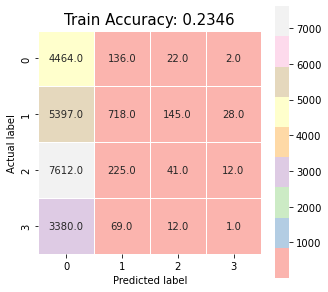

Classification Report for the Train Subset: 

               precision    recall  f1-score   support

           0       0.21      0.97      0.35      4624
           1       0.63      0.11      0.19      6288
           2       0.19      0.01      0.01      7890
           3       0.02      0.00      0.00      3462

    accuracy                           0.23     22264
   macro avg       0.26      0.27      0.14     22264
weighted avg       0.29      0.23      0.13     22264



In [27]:
# Computing the confusion matrix for the train subset

train_c_matrix = confusion_matrix(y_train, y_train_pred)  # Compute the train confusion matrix

plt.figure(figsize=(5,5))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train Accuracy: {0}'.format(round(train_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

# Print the train classification report

print('Classification Report for the Train Subset: \n\n', classification_report(y_train, y_train_pred))

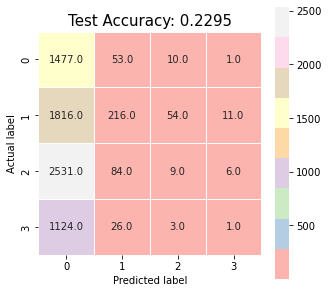

Classification Report for the Test Subset: 

               precision    recall  f1-score   support

           0       0.21      0.96      0.35      1541
           1       0.57      0.10      0.17      2097
           2       0.12      0.00      0.01      2630
           3       0.05      0.00      0.00      1154

    accuracy                           0.23      7422
   macro avg       0.24      0.27      0.13      7422
weighted avg       0.26      0.23      0.12      7422



In [28]:
# Computing the confusion matrix for the test subset

test_c_matrix = confusion_matrix(y_test, y_test_pred)  # Compute the test confusion matrix

plt.figure(figsize=(5,5))
sns.heatmap(test_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

# Print the train classification report

print('Classification Report for the Test Subset: \n\n', classification_report(y_test, y_test_pred))

Logistic Regression did not perform well since our target variable points are overlapping so it is tough to make a line while dividing the classes. Hence we will move onto other classifiers.

**Linear Discriminant Analysis (LDA)**

In [29]:
lda_clf = LinearDiscriminantAnalysis() # Instantiating the lda classifier
lda_clf.fit(X_train, y_train)          # Fitting the train data

# Finding the predictions of the lda classifier for train and test subsets

train_y_pred_lda = lda_clf.predict(X_train)
test_y_pred_lda = lda_clf.predict(X_test)

In [30]:
train_score_lda = metrics.accuracy_score(y_train, train_y_pred_lda)   # Compute train accuracy
test_score_lda = metrics.accuracy_score(y_test, test_y_pred_lda)      # Compute test accuracy
train_report_lda = classification_report(y_train, train_y_pred_lda)   # Generate classification report for train data
test_report_lda = classification_report(y_test, test_y_pred_lda)      # Generate classification report for test data

print('LDA Train Classification Report: \n\n', train_report_lda,'\n\n')
print('LDA Test Classification Report: \n\n', test_report_lda)

LDA Train Classification Report: 

               precision    recall  f1-score   support

           0       0.60      0.42      0.49      4624
           1       0.55      0.58      0.57      6288
           2       0.47      0.73      0.57      7890
           3       0.00      0.00      0.00      3462

    accuracy                           0.51     22264
   macro avg       0.40      0.43      0.41     22264
weighted avg       0.44      0.51      0.46     22264
 


LDA Test Classification Report: 

               precision    recall  f1-score   support

           0       0.57      0.41      0.48      1541
           1       0.55      0.57      0.56      2097
           2       0.46      0.73      0.57      2630
           3       0.00      0.00      0.00      1154

    accuracy                           0.50      7422
   macro avg       0.40      0.43      0.40      7422
weighted avg       0.44      0.50      0.46      7422



/Users/arushiagarwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arushiagarwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arushiagarwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

Since our target variable points are overlapping, we assume classifiers with decision trees must give better results so we will try Decision Trees, Random Forest, and Gradient Boosting Classifiers now.

**Decision Trees**

In [31]:
tr_clf = tree.DecisionTreeClassifier()  # Instantiating tree classifier
tr_clf.fit(X, y)                        # Fitting the whole data to tree classifier

DecisionTreeClassifier()

In [32]:
# Computing various classification evaluation metrics and presenting the classification report

# Finding the predictions of tree classifier for train and test subsets
train_y_pred = tr_clf.predict(X_train)
test_y_pred = tr_clf.predict(X_test)        

train_score = metrics.accuracy_score(y_train, train_y_pred)         # Compute train
accuracytest_score = metrics.accuracy_score(y_test, test_y_pred)    # Compute test
accuracytrain_report = classification_report(y_train, train_y_pred) # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)            # Generate classification report for test data
print('Decision Tree Train Classification Report: \n\n', train_report,'\n\n')
print('Decision Tree Test Classification Report: \n\n', test_report)

Decision Tree Train Classification Report: 

               precision    recall  f1-score   support

           0       0.77      0.75      0.76      4587
           1       0.71      0.80      0.75      6291
           2       0.61      0.78      0.69      7932
           3       0.81      0.13      0.23      3454

    accuracy                           0.68     22264
   macro avg       0.72      0.62      0.61     22264
weighted avg       0.70      0.68      0.65     22264
 


Decision Tree Test Classification Report: 

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1541
           1       0.96      1.00      0.98      2097
           2       0.99      0.97      0.98      2630
           3       1.00      0.97      0.99      1154

    accuracy                           0.98      7422
   macro avg       0.99      0.98      0.98      7422
weighted avg       0.98      0.98      0.98      7422



In [33]:
# Using GridSearchCV to figure out the best values of the tree hyperparameters

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': list(range(2, 20))}
grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=3), params, refit = True, verbose = 1, n_jobs=-1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 1764 candidates, totalling 5292 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=3), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18,
                                               19]},
             verbose=1)

In [34]:
# Displaying the best hyperparameters from 'params'

grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=98, min_samples_split=16, random_state=3)

In [54]:
# Retraining the tree classifier (this time with best hyperparameters found above)

tr_clf = tree.DecisionTreeClassifier(max_leaf_nodes=98, min_samples_split=16, random_state=3)
tr_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=98, min_samples_split=16, random_state=3)

In [55]:
# Computing various classification evaluation metrics and presenting the classification report

# Finding the predictions of tree classifier for train and test subsets
train_y_pred = tr_clf.predict(X_train)
test_y_pred = tr_clf.predict(X_test)        

train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train
accuracytest_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test
accuracytrain_report = classification_report(y_train, train_y_pred) # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate classification report for test data
print('Decision Tree Train Classification Report: \n\n', train_report,'\n\n')
print('Decision Tree Test Classification Report: \n\n', test_report)

Decision Tree Train Classification Report: 

               precision    recall  f1-score   support

           0       0.64      0.54      0.59      4624
           1       0.61      0.72      0.66      6288
           2       0.54      0.66      0.59      7890
           3       0.45      0.17      0.25      3462

    accuracy                           0.58     22264
   macro avg       0.56      0.52      0.52     22264
weighted avg       0.57      0.58      0.56     22264
 


Decision Tree Test Classification Report: 

               precision    recall  f1-score   support

           0       0.59      0.51      0.55      1541
           1       0.57      0.70      0.63      2097
           2       0.54      0.62      0.58      2630
           3       0.38      0.17      0.24      1154

    accuracy                           0.55      7422
   macro avg       0.52      0.50      0.50      7422
weighted avg       0.53      0.55      0.53      7422



**Random Forest Classifier**

In [37]:
# Using GridSearchCV to figure out the best values of the tree hyperparameters

params = {'max_leaf_nodes': list(range(2, 50)), 'max_depth': list(range(2,20))}
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=3), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=3),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...]},
             verbose=1)

In [38]:
# Displaying the best hyperparameters from 'params'

grid_search_cv.best_estimator_

RandomForestClassifier(max_depth=9, max_leaf_nodes=49, random_state=3)

In [56]:
# Constructing a random forest classifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=9, max_leaf_nodes=49, random_state=3)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_leaf_nodes=49, random_state=3)

In [57]:
# Finding the predictions of random forest classifier for train and test subsets

train_y_pred = rf_clf.predict(X_train)
test_y_pred = rf_clf.predict(X_test)


train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Random Forest Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Random Forest Classifier Test Classification Report: \n\n', test_report)

Random Forest Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       0.65      0.51      0.57      4624
           1       0.58      0.76      0.65      6288
           2       0.53      0.65      0.58      7890
           3       0.46      0.11      0.18      3462

    accuracy                           0.57     22264
   macro avg       0.55      0.51      0.50     22264
weighted avg       0.56      0.57      0.54     22264
 


Random Forest Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.64      0.49      0.56      1541
           1       0.56      0.74      0.63      2097
           2       0.53      0.63      0.57      2630
           3       0.42      0.10      0.17      1154

    accuracy                           0.55      7422
   macro avg       0.54      0.49      0.48      7422
weighted avg       0.54      0.55      0.52      7422



**Gradient Boosting Classifiers**

In [41]:
# Using GridSearchCV to figure out the best values of the tree hyperparameters

params = {'max_depth': list(range(2, 20)), 'learning_rate': [0.001, 0.01, 0.1, 1]}

grid_search_cv = GridSearchCV(GradientBoostingClassifier(random_state=3), params, refit = True, verbose = 1, n_jobs=-1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Users/arushiagarwal/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=3),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19]},
             verbose=1)

In [42]:
# Displaying the best hyperparameters from 'params'

grid_search_cv.best_estimator_

GradientBoostingClassifier(max_depth=5, random_state=3)

In [58]:
# Setting new hyperparameters for gradient boosting regressor
gb_params = {'n_estimators': 80, 'max_depth': 5, 'min_samples_split': 15, 'learning_rate': 0.01}

gb_reg = GradientBoostingClassifier(**gb_params)  # Applying the new hyperparameters
gb_reg.fit(X_train, y_train)                     # Fitting the train data

GradientBoostingClassifier(learning_rate=0.01, max_depth=5,
                           min_samples_split=15, n_estimators=80)

In [59]:
# Finding the predictions of gradient boosting regressor for train and test subsets

train_y_pred = gb_reg.predict(X_train)
test_y_pred = gb_reg.predict(X_test)

r2_train_score = gb_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = gb_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  0.5521 

R^2 score for test dataset =  0.5422 



In [60]:
gb_reg = GradientBoostingClassifier()  # Instantiating GradientBoostingRegressor
gb_reg.fit(X_train, y_train)          # Fitting the train data

GradientBoostingClassifier()

In [61]:
# Finding the predictions of gradient boosting regressor for train and test subsets

train_y_pred = gb_reg.predict(X_train)
test_y_pred = gb_reg.predict(X_test)

r2_train_score = gb_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = gb_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  0.578 

R^2 score for test dataset =  0.5624 



In [62]:
# Finding the predictions of random forest classifier for train and test subsets

train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Random Forest Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Random Forest Classifier Test Classification Report: \n\n', test_report)

Random Forest Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       0.64      0.53      0.58      4624
           1       0.60      0.75      0.66      6288
           2       0.55      0.65      0.60      7890
           3       0.48      0.16      0.24      3462

    accuracy                           0.58     22264
   macro avg       0.57      0.52      0.52     22264
weighted avg       0.57      0.58      0.56     22264
 


Random Forest Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.63      0.52      0.57      1541
           1       0.58      0.72      0.64      2097
           2       0.54      0.64      0.59      2630
           3       0.44      0.15      0.22      1154

    accuracy                           0.56      7422
   macro avg       0.55      0.51      0.50      7422
weighted avg       0.55      0.56      0.54      7422



For Gradient boosting, we are getting slightly better results without tuning the hyperparameters so we will take that into consideration.

**Stacking Classifier**

In [63]:
# Using Random Forest, Decision Trees, Gradient Boosting Classifiers as
# Level 0 estimators and Logistic Regression as final estimator in Stacking

estimators = [('rf', rf_clf),
              ('tr_clf', tr_clf),
              ('gb', gb_reg)]

stack_clf = StackingClassifier(estimators=estimators, 
                               final_estimator=LogisticRegression())

In [64]:
stack_clf.fit(X_train, y_train)

/Users/arushiagarwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=9,
                                                       max_leaf_nodes=49,
                                                       random_state=3)),
                               ('tr_clf',
                                DecisionTreeClassifier(max_leaf_nodes=98,
                                                       min_samples_split=16,
                                                       random_state=3)),
                               ('gb', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [65]:
train_y_pred = stack_clf.predict(X_train)
test_y_pred = stack_clf.predict(X_test)

r2_train_score = stack_clf.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = stack_clf.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  0.575 

R^2 score for test dataset =  0.5593 



In [66]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Stacking Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Stacking Classifier Test Classification Report: \n\n', test_report)

Stacking Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       0.64      0.54      0.59      4624
           1       0.61      0.72      0.66      6288
           2       0.54      0.66      0.59      7890
           3       0.45      0.17      0.25      3462

    accuracy                           0.58     22264
   macro avg       0.56      0.52      0.52     22264
weighted avg       0.57      0.58      0.56     22264
 


Stacking Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.62      0.53      0.57      1541
           1       0.59      0.69      0.64      2097
           2       0.53      0.65      0.58      2630
           3       0.43      0.16      0.23      1154

    accuracy                           0.56      7422
   macro avg       0.54      0.51      0.51      7422
weighted avg       0.55      0.56      0.54      7422



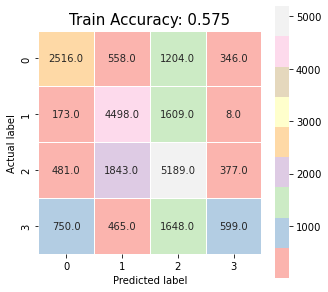

In [67]:
# Computing the confusion matrix for the train subset

from sklearn.metrics import confusion_matrix, classification_report

train_c_matrix = confusion_matrix(y_train, train_y_pred)  # Compute the train confusion matrix

plt.figure(figsize=(5,5))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train Accuracy: {0}'.format(round(train_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()


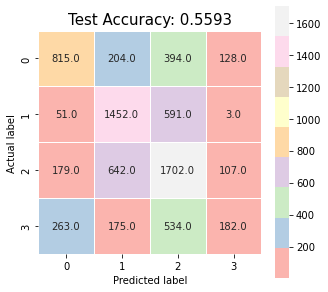

In [68]:
# Computing the confusion matrix for the test subset

test_c_matrix = confusion_matrix(y_test, test_y_pred)  # Compute the test confusion matrix

plt.figure(figsize=(5,5))
sns.heatmap(test_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()


**********
## Random Forest, Bagging, GradientBoosting

We took RandomForest Regression and explored areas to focus on data collection to improve results under the working hypothesis that location is the biggest driver in housing prices and the data set we were working with did not contain enough values in a particular location for the model to recognize that pattern. 
**********

**********
**ALL DATA Without Scaling Features**

In [26]:
#Defining a method to create a visualization for predicted price vs. actual price in test data
def pred_vs_real(y_test, test_y_pred):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.scatter(y_test, test_y_pred, edgecolors=(0.3, 0.2, 0.7))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Real Price')
    ax.set_ylabel('Predicted Price')
    plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
    plt.show()

In [27]:
#Setting target variable and features
target = df['Price']
features = df[['Sqr Ft','Lot Size','Beds', 'Bath', 'State', 'Property Type', 'Garage',
              'Fireplace','HOA','Air Conditioning', 'Basement', 'Patio', 'Porch', 'Washer',
              'Dryer', 'Laundry', 'Stories', 'House Age']]

#Encode dummy variables, split into test/train with 25% test group
features = pd.get_dummies(features)

X = features.values
y = target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=3)

**Random Forest Regressor with no hyperparameter Tuning**

In [28]:
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=3) 
rf_reg.fit(X_train, y_train)

train_y_pred = rf_reg.predict(X_train)
test_y_pred = rf_reg.predict(X_test)
r2_train_score = rf_reg.score(X_train, y_train)
r2_test_score = rf_reg.score(X_test, y_test)
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  0.9283 

R^2 score for test dataset =  0.3243 



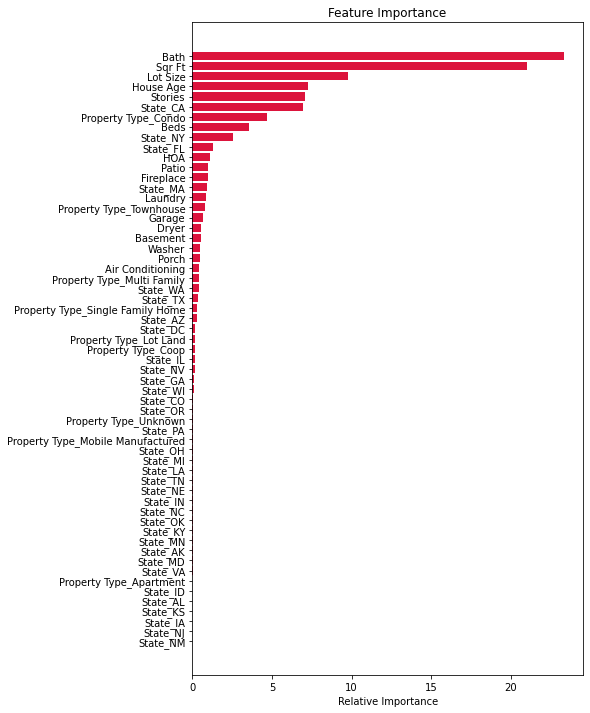

In [29]:
# Getting Feature importance
feature_importance = rf_reg.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))
sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 12))
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, features.columns[sorted_idx])
plt.show()

R^2 score for train dataset =  0.9037 

R^2 score for test dataset =  0.3242 



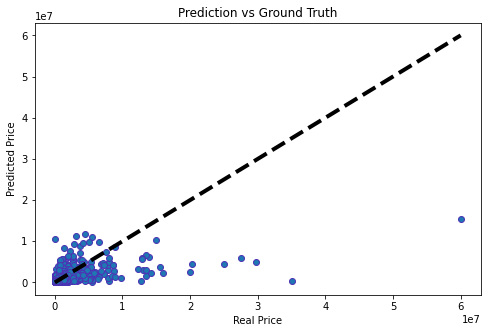

In [30]:
#Rerunning with important features, still no hyperparameter tuning, decided to 
#leave state dummy variables since so few were identified as important features
features_imp = features[['Stories', 'Bath', 'Beds', 'Sqr Ft', 'Lot Size', 'House Age']]

X = features_imp.values
y = target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=3)
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=3) 
rf_reg.fit(X_train, y_train)

train_y_pred = rf_reg.predict(X_train)
test_y_pred = rf_reg.predict(X_test)
r2_train_score = rf_reg.score(X_train, y_train)
r2_test_score = rf_reg.score(X_test, y_test)
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

#visualization of the results
pred_vs_real(y_test, test_y_pred)

In [ ]:
#Tuning hyperparameters using gridsearch
parameters ={ 
    'n_estimators' : [500, 1000, 2000],
    'max_depth' : [5, 10, 15],
    'min_samples_split' : [2, 50, 100],   
    'min_samples_leaf' : [1, 10, 100],
    'max_features' : ['sqrt', 'log2', None] }                    
grid = GridSearchCV(RandomForestRegressor(), parameters, refit=True, verbose = 3, n_jobs = -1)
grid.fit(X_train, y_train)
print('\n Best choices for hyperparameters:\n', grid.best_params_) 

R^2 score for train dataset =  0.863 

R^2 score for test dataset =  0.327 



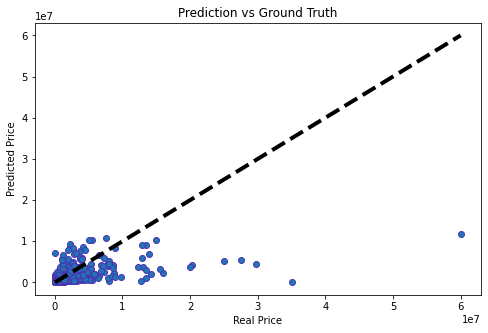

In [31]:
rf_reg = RandomForestRegressor(n_estimators=1000, max_depth = 15, max_features = 'sqrt',
                               min_samples_split = 2, random_state=3) 
rf_reg.fit(X_train, y_train)

train_y_pred = rf_reg.predict(X_train)
test_y_pred = rf_reg.predict(X_test)
r2_train_score = rf_reg.score(X_train, y_train)
r2_test_score = rf_reg.score(X_test, y_test)
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

#Visualization of results
pred_vs_real(y_test, test_y_pred)

In [ ]:
#See if gradient boosting can improve results
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
train_y_pred = gb_reg.predict(X_train)
test_y_pred = gb_reg.predict(X_test)
r2_train_score = gb_reg.score(X_train, y_train)
r2_test_score = gb_reg.score(X_test, y_test)
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

#Set Hyperparameters to try to improve performance
parameters ={ 
    'n_estimators' : [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_depth' : [int(x) for x in np.linspace(2, 20, num = 6)],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'min_samples_split' : [2, 5, 10],   
    'min_samples_leaf' : [1, 2, 4] }                     
grid = GridSearchCV(GradientBoostingRegressor(), parameters, refit=True, verbose = 3, n_jobs = -1)
grid.fit(X_train, y_train)
print('\n Best choices for hyperparameters:\n', grid.best_params_) 
grid_predictions = grid.predict(X_test)

R^2 score for train dataset =  0.955 

R^2 score for test dataset =  0.3459 



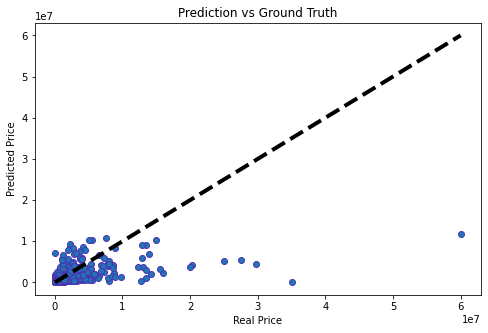

In [32]:
#Result of grid search: learning_rate=0.001, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=1600
gb_params = {'n_estimators': 1600, 'max_depth': 5, 'min_samples_split':5,'learning_rate': .1}
gb_reg = GradientBoostingRegressor(**gb_params)

gb_reg.fit(X_train, y_train) 
train_y_pred = gb_reg.predict(X_train)
r2_train_score = gb_reg.score(X_train, y_train)
r2_test_score = gb_reg.score(X_test, y_test)
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

pred_vs_real(y_test, test_y_pred)

R^2 score for train dataset =  0.6619 

R^2 score for test dataset =  0.2488 



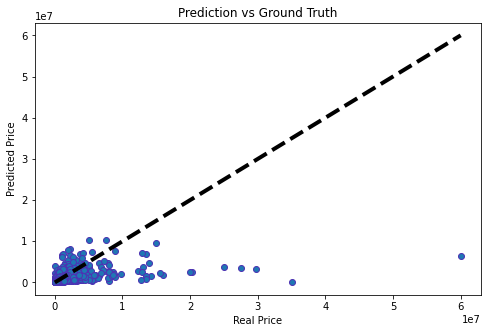

In [34]:
#See if Bagging can improve high variance between test and train performance
#Bagging
bag_reg = BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=1000, max_depth = 15, max_features = 'sqrt',
                               min_samples_split = 2, random_state=3), n_estimators=18,max_samples=0.5, max_features=4, bootstrap=False, random_state=3)
bag_reg.fit(X_train, y_train)
train_y_pred = bag_reg.predict(X_train)
test_y_pred = bag_reg.predict(X_test)

r2_train_score = bag_reg.score(X_train, y_train)
r2_test_score = bag_reg.score(X_test, y_test)
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

#Visualization of results
pred_vs_real(y_test, test_y_pred)

Bagging was much more expensive/time consuming to run and did not improve the high variance between the test and train data set thus I do not plan on using it with the subsetted data as I move forward and try to identify how to improve predictions. 

***
**Scaling target variable and features and removing outliers**

Since we were unable to reconcile/verify the highest prices/sq ft/lot size and they were magnitudes higher than the other instances in the dataset, we decided to see how performace would be affected with the removal of these outliers. We also scaled the data using log to create a more normal distribution.


In [35]:
#Create a copy of the dataframe
df_scale = df.copy(deep=True)

#Scaling for each of the continuous features and the target variable
for var in ['Lot Size', 'Sqr Ft', 'Price']:
    df_scale[var]= np.log(df_scale[var], where =df_scale[var]>0)

#Remove outliers
df_scale = df_scale[(df_scale['Sqr Ft']<100)&(df_scale['Lot Size']<100)]

# Set target variable and features
target = df_scale['Price']
features = df_scale[['Sqr Ft','Lot Size','Beds', 'Bath', 'State', 'Property Type', 'Garage',
              'Fireplace','HOA','Air Conditioning', 'Basement', 'Patio', 'Porch', 'Washer',
              'Dryer', 'Laundry', 'Stories', 'House Age']]

#Remove set -infinite values to 0, encode dummy variables, save each feature astype 'float32' 
features = pd.get_dummies(features)
features =features.astype('float32')
features.replace([np.inf, -np.inf], 0, inplace=True)

#Split data into test/train
X = features.values
y = target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=3)

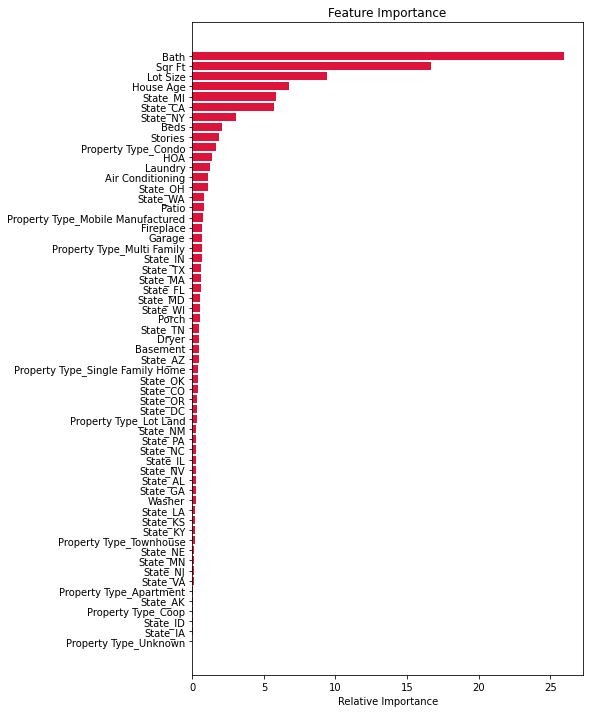

R^2 score for train dataset =  0.9104 

R^2 score for test dataset =  0.5657 



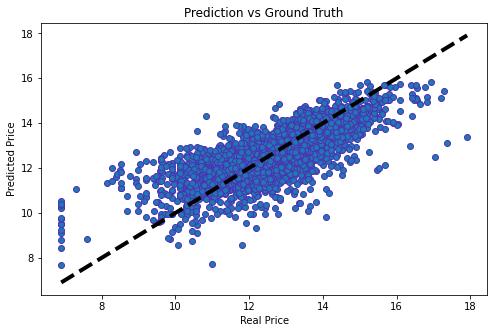

In [36]:
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=3) 
rf_reg.fit(X_train, y_train)

train_y_pred = rf_reg.predict(X_train)
test_y_pred = rf_reg.predict(X_test)
r2_train_score = rf_reg.score(X_train, y_train)
r2_test_score = rf_reg.score(X_test, y_test)

feature_importance = rf_reg.feature_importances_

feature_importance = 100.0*(feature_importance/np.sum(feature_importance))
sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 12))
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, features.columns[sorted_idx])
plt.show()

#Re run with only important features
features_imp = features[['Stories', 'Bath', 'Beds', 'Sqr Ft', 'Lot Size', 'House Age', 'State_MI', 'State_CA', 'State_NY']]

X = features_imp.values
y = target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=3)

rf_reg = RandomForestRegressor(n_estimators=1000, random_state=3) 
rf_reg.fit(X_train, y_train)

train_y_pred = rf_reg.predict(X_train)
test_y_pred = rf_reg.predict(X_test)
r2_train_score = rf_reg.score(X_train, y_train)
r2_test_score = rf_reg.score(X_test, y_test)
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

pred_vs_real(y_test, test_y_pred)

In [ ]:
#Tune Hyperparameters for random forest
parameters ={ 
    'n_estimators' : [500, 1000, 2000],
    'max_depth' : [5, 10, 15],
    'min_samples_split' : [2, 50, 100],   
    'min_samples_leaf' : [1, 10, 100],
    'max_features' : ['sqrt', 'log2', None] }                    
grid = GridSearchCV(RandomForestRegressor(), parameters, refit=True, verbose = 3, n_jobs = -1)
grid.fit(X_train, y_train)
print('\n Best choices for hyperparameters:\n', grid.best_params_) 


R^2 score for train dataset =  0.6409 

R^2 score for test dataset =  0.5864 



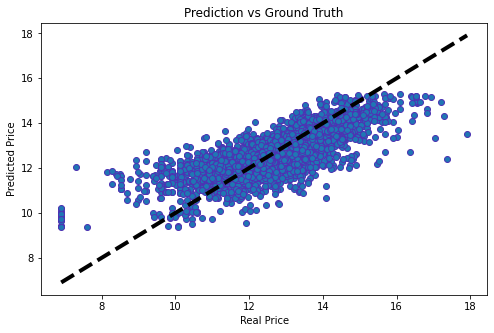

In [48]:
#RandomForest Regressor using new hyperparameters
rf_reg = RandomForestRegressor(n_estimators=1000, max_depth = 15, max_features = 'log2',
                               min_samples_split = 50, random_state=3) 
rf_reg.fit(X_train, y_train)

train_y_pred = rf_reg.predict(X_train)
test_y_pred = rf_reg.predict(X_test)
r2_train_score = rf_reg.score(X_train, y_train)
r2_test_score = rf_reg.score(X_test, y_test)
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')
pred_vs_real(y_test, test_y_pred)

In [49]:
#Get Median Absolute Error for best performing 
from sklearn.metrics import median_absolute_error
print('MAE for best regression model: ',median_absolute_error(y_test, test_y_pred))


MAE for best regression model:  0.3156751606030408


In [45]:
#Looking at an individual tree to better understand how much the regressor is breaking down the target variable
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 15, max_features = 'sqrt',
                               min_samples_split = 2, random_state=3)
regressor.fit(X_train, y_train)
train_y_pred = regressor.predict(X_train)
test_y_pred = regressor.predict(X_test)

r2_train_score = regressor.score(X_train, y_train)
r2_test_score = regressor.score(X_test, y_test)
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')
print("Number of leaves on one tree: ",regressor.get_n_leaves())

R^2 score for train dataset =  0.7546 

R^2 score for test dataset =  0.419 

Number of leaves on one tree:  3596


*****************************************
**Looking at just Properties in Texas since it is the state with the most properites**

In [50]:
df_TX = df_scale[(df_scale['State']=='TX')]


target = df_TX['Price']
features = df_TX[['Sqr Ft','Lot Size','Beds', 'Bath', 'Property Type', 'Garage',
              'Fireplace','HOA','Air Conditioning', 'Basement', 'Patio', 'Porch', 'Washer',
              'Dryer', 'Laundry', 'Stories', 'House Age']]

#Remove infinite values, create dummyvariables 
features = pd.get_dummies(features)
features =features.astype('float32')
features.replace([np.inf, -np.inf], 0, inplace=True)

In [51]:
#Split the data into test and train
X = features.values
y = target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=3)

R^2 score for train dataset =  0.9363 

R^2 score for test dataset =  0.5805 



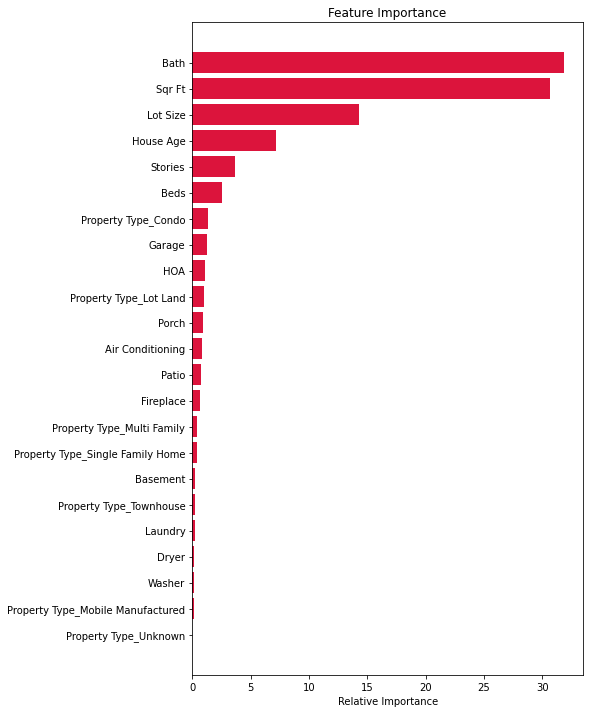

In [52]:
#Check to see if anything has changed with feature selection
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=3) 
rf_reg.fit(X_train, y_train)

train_y_pred = rf_reg.predict(X_train)
test_y_pred = rf_reg.predict(X_test)
r2_train_score = rf_reg.score(X_train, y_train)
r2_test_score = rf_reg.score(X_test, y_test)
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

feature_importance = rf_reg.feature_importances_

feature_importance = 100.0*(feature_importance/np.sum(feature_importance))
sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 12))
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, features.columns[sorted_idx])
plt.show()


R^2 score for train dataset =  0.6827 

R^2 score for test dataset =  0.5805 



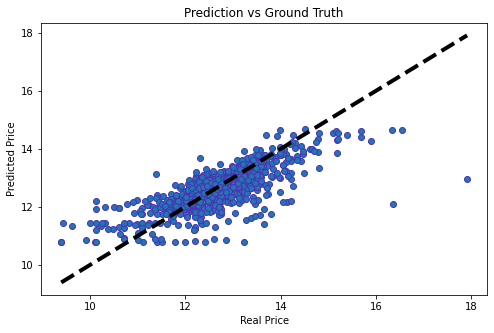

MAE for best regression model:  0.2262437203425769


In [54]:
#Retrain Random forest regressor using data from just Texas
features_imp = features[['Stories', 'Bath', 'Beds', 'Sqr Ft', 'Lot Size', 'House Age']]

X = features_imp.values
y = target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=3)

rf_reg = RandomForestRegressor(n_estimators=1000, max_depth = 15, max_features = 'log2',
                               min_samples_split = 50, random_state=3) 
rf_reg.fit(X_train, y_train)

train_y_pred = rf_reg.predict(X_train)
test_y_pred = rf_reg.predict(X_test)
r2_train_score = rf_reg.score(X_train, y_train)
r2_test_score = rf_reg.score(X_test, y_test)
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')
pred_vs_real(y_test, test_y_pred)

print('MAE for best regression model: ',median_absolute_error(y_test, test_y_pred))

**********
# Linear Regression

**********

In [6]:
df = df.drop(['Price Category'], axis=1)

<AxesSubplot:>

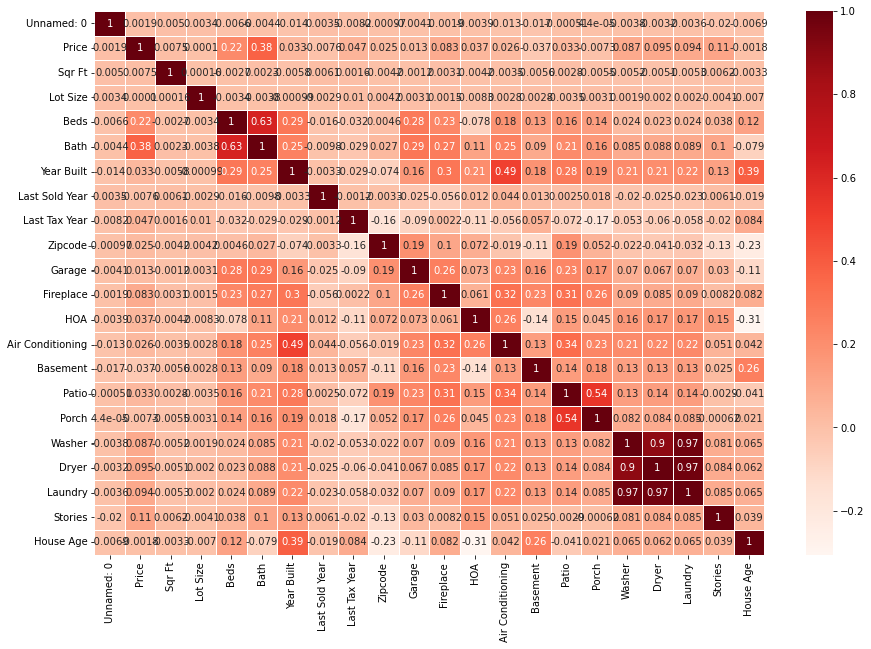

In [7]:
#heat map to find correlation amoung the features
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), linewidths=.5, cmap = 'Reds', annot = True)

In [8]:
#spearman correlation to find imp features to the target variable
cols = df.columns
from scipy.stats import spearmanr    # For Spearman correlation

for col in cols[:-1]:
    rho, p = spearmanr(df[col].values, df['Price'].values)
    print('Spearman correlation between PRICE and %s is %s' %(col, round(rho, 4)))

Spearman correlation between PRICE and Unnamed: 0 is 0.006
Spearman correlation between PRICE and Uniq Id is 0.0038
Spearman correlation between PRICE and Price is 1.0
Spearman correlation between PRICE and Sqr Ft is 0.5386
Spearman correlation between PRICE and Lot Size is 0.0701
Spearman correlation between PRICE and Beds is 0.3339
Spearman correlation between PRICE and Bath is 0.5426
Spearman correlation between PRICE and Year Built is 0.209
Spearman correlation between PRICE and Features is 0.0644
Spearman correlation between PRICE and Last Sold Year is nan
Spearman correlation between PRICE and Last Sold For is nan
Spearman correlation between PRICE and Last Tax Assestment is nan
Spearman correlation between PRICE and Last Tax Year is nan
Spearman correlation between PRICE and Address is -0.0255
Spearman correlation between PRICE and City is 0.0707
Spearman correlation between PRICE and State is -0.1825
Spearman correlation between PRICE and Zipcode is 0.1456
Spearman correlation 

In [9]:
#using most prominet features to "Price" variable
X = df[['Bath','Sqr Ft','Beds','House Age']]     # Features
y = df['Price']              # Target 

In [10]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [11]:
reg = LinearRegression()         # Instantiate
reg.fit(X_train, y_train)        # Fit the train data

r2_train_score = reg.score(X_train, y_train)   # Calculating R^2 score for train

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.1401 

Coefficients of Linear Model: [ 2.62053128e+05  2.66903545e-02 -2.12174262e+04  9.09330432e+02] 

Intercept: -72457.26342992671


In [12]:
y_pred = reg.predict(X_test)

y_pred[:10]

array([187799.40704446, 409553.26177561, 379558.67601175, 425036.00719733,
       442597.69535888, 753782.58431518, 419857.76197425, 635255.72537765,
       654341.8157055 , 425326.23565119])

In [13]:
r2_test_score = reg.score(X_test, y_test)   # Calculating R^2 score for train

print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for test dataset =  0.1413 



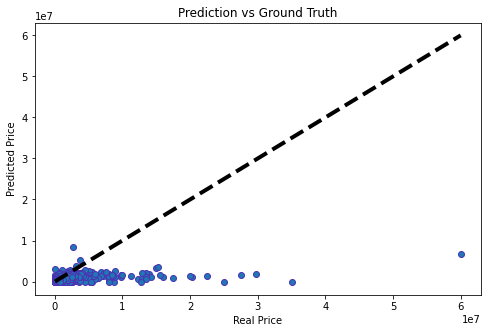

In [14]:
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real Price')
ax.set_ylabel('Predicted Price')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

**Lasso Regression**

In [15]:
#lasso regression model 
#finding r2 value
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model2 = make_pipeline(StandardScaler(), Lasso(alpha=.015))

model2.fit(X_train, y_train)

print(f'model score on training data: {model2.score(X_train, y_train)}')
print(f'model score on testing data: {model2.score(X_test, y_test)}')

model score on training data: 0.14010352823557604
model score on testing data: 0.14125085474469978


In [19]:
#performing xgboost
import xgboost as xgb 

# Instantiate 'XGBRegressor'
xgb_reg = xgb.XGBRegressor(n_estimators=700, max_depth=7, eta=0.04, subsample=0.8)  

xgb_reg.fit(X_train, y_train)
train_y_pred = xgb_reg.predict(X_train)
test_y_pred = xgb_reg.predict(X_test)

r2_train_score = xgb_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = xgb_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  0.8793 

R^2 score for test dataset =  0.2425 

